In [2]:
#Import necessary libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

from google.colab import drive#SG
#Mounting the drive
drive.mount('/content/gdrive')#SG

Mounted at /content/gdrive


In [3]:
#Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define training generator with the local path
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Train",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
)


FileNotFoundError: ignored

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Train",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

Found 4257 images belonging to 38 classes.


In [ ]:
# Define constants
img_height, img_width = 224, 224  # Set the height and width of the input images
num_classes = 38  # Number of classes in the classification task
batch_size = 32  # Batch size used during training

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Load the VGG16 model pre-trained on ImageNet.
# 'include_top=False' removes the final fully connected layers (top layers) since we will add our custom head.

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False
# Freeze the weights of the convolutional layers in the base model.
# We do this to use the pre-trained features without modifying them during training.

# Add custom classification head
model = models.Sequential()
model.add(base_model)
# Add the pre-trained VGG16 base model to the sequential model.

model.add(layers.GlobalAveragePooling2D())
# Use Global Average Pooling to reduce the spatial dimensions of the features.

model.add(layers.Dense(256, activation='relu'))
# Add a dense layer with 256 units and ReLU activation function.

model.add(layers.Dropout(0.5))
# Add a dropout layer with a dropout rate of 0.5 to reduce overfitting.

model.add(layers.Dense(num_classes, activation='softmax'))
# Add the final dense layer with softmax activation for multi-class classification.

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Compile the model using the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,  # Train the model for 5 epochs, adjust as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
# Train the model on the training data using the generator, with validation on the validation data.
# 'steps_per_epoch' and 'validation_steps' define the number of batches per epoch during training and validation.


Epoch 1/5
  7/533 [..............................] - ETA: 1:12:37 - loss: 3.7381 - accuracy: 0.0446

In [ ]:
test_set = test_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Test",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 380 images belonging to 38 classes.
12/12 [==============================] - 95s 8s/step - loss: 0.4737 - accuracy: 0.8921
Test Accuracy: 89.21%


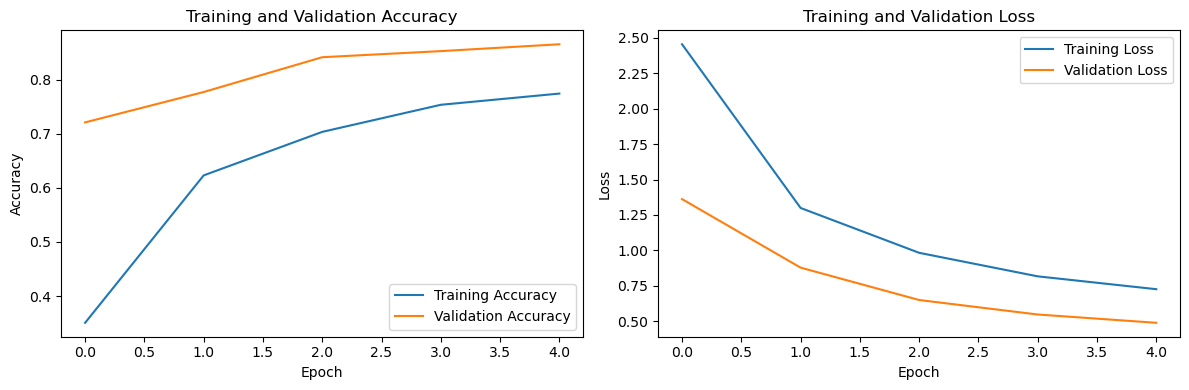

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
# Plot Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Plot Training Loss and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 221ms/step
Test Image: C:\Users\AsmaA\Desktop\Neural Networks\Project\Test\Strawberry___healthy\0b444634-b557-45f4-a68a-8e9e38cd6683___RS_HL 2184_180deg.JPG
Predicted Class: Strawberry___healthy (Class Number: 27)


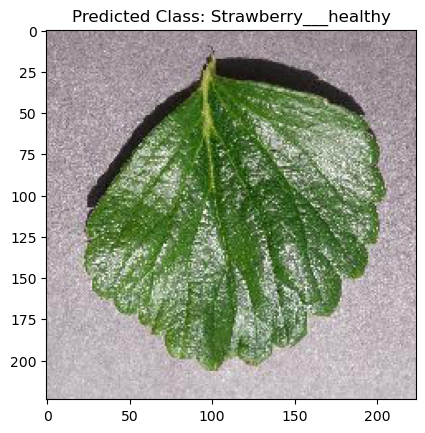

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Choose a random sample from the test set
random_index = random.randint(0, len(test_set.filenames) - 1)
sample_path = os.path.join('C:\\Users\\AsmaA\\Desktop\\Neural Networks\\Project\\Test', test_set.filenames[random_index])

# Load the image for prediction
img = load_img(sample_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale pixel values

# Make a prediction
prediction = model.predict(img_array)
predicted_class_number = np.argmax(prediction)

# Map class number to class name
class_name = [k for k, v in test_set.class_indices.items() if v == predicted_class_number][0]

# Print the result
print(f'Test Image: {sample_path}')
print(f'Predicted Class: {class_name} (Class Number: {predicted_class_number})')

# Visualize the tested image
plt.imshow(img)
plt.title(f'Predicted Class: {class_name}')
plt.show()